<a href="https://colab.research.google.com/github/Vik7am10/PatternRecognition/blob/main/BillionaireEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5) #set default figure size
import numpy as np
from numpy import exp
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col

In [ ]:
pd.options.display.max_columns = 10

# Load in data and view
df = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/mle/fp.dta?raw=true')

In [ ]:
# Filter for Russian billionaires
russian_data = df[df['country'] == 'Russian Federation'][['year', 'numbil']]

# Filter for American billionaires
american_data = df[df['country'] == 'United States'][['year', 'numbil']]

# Aggregate the data by year (sum the number of billionaires)
russian_data = russian_data.groupby('year', as_index=False).agg({'numbil': 'sum'})
american_data = american_data.groupby('year', as_index=False).agg({'numbil': 'sum'})

# Reset index for better readability (optional)
russian_data.reset_index(drop=True, inplace=True)
american_data.reset_index(drop=True, inplace=True)

# Renaming columns for clarity
russian_data.columns = ['Year', 'NumberOfBillionaires']
american_data.columns = ['Year', 'NumberOfBillionaires']

# Display the transformed DataFrames
print("Russian Billionaires Data:")
print(russian_data)

print("\nAmerican Billionaires Data:")
print(american_data)

Russian Billionaires Data:
      Year  NumberOfBillionaires
0   1990.0                   0.0
1   1996.0                   0.0
2   1997.0                   4.0
3   1998.0                   1.0
4   1999.0                   0.0
5   2000.0                   0.0
6   2001.0                   8.0
7   2002.0                   6.0
8   2003.0                  17.0
9   2004.0                  25.0
10  2005.0                  27.0
11  2006.0                  33.0
12  2007.0                  53.0
13  2008.0                  87.0
14  2009.0                  32.0
15  2010.0                  62.0
16  2011.0                 101.0
17  2012.0                  96.0
18  2013.0                 110.0
19  2014.0                 111.0
20  2015.0                  88.0

American Billionaires Data:
      Year  NumberOfBillionaires
0   1990.0                   0.0
1   1991.0                   0.0
2   1992.0                   0.0
3   1993.0                   0.0
4   1994.0                   0.0
5   1995.0          

In [ ]:
import numpy as np
from scipy.special import factorial

class PoissonRegression:
    def __init__(self, y, X, β):
        self.y = y
        self.X = X
        self.β = β

    def μ(self):
        # Mean (expected value) of the Poisson distribution
        return np.exp(self.X @ self.β)

    def logL(self):
        # Log-likelihood function
        y = self.y
        μ = self.μ()
        return np.sum(y * np.log(μ) - μ - np.log(factorial(y, exact=False)))

    def G(self):
        # Gradient of the log-likelihood
        μ = self.μ()
        return self.X.T @ (self.y - μ)

    def H(self):
        # Hessian of the log-likelihood
        μ = self.μ()
        diag_mu = np.diag(μ)  # Create a diagonal matrix of μ values
        return -self.X.T @ diag_mu @ self.X

In [ ]:
import numpy as np

def newton_raphson(model, tol=1e-3, max_iter=1000, display=True):
    i = 0
    error = 100  # Initial error value

    # Print header of output
    if display:
        header = f'{"Iteration_k":<13}{"Log-likelihood":<16}{"θ":<60}'
        print(header)
        print("-" * len(header))

    # While loop runs while any value in error is greater
    # than the tolerance until max iterations are reached
    while np.any(error > tol) and i < max_iter:
        H, G = model.H(), model.G()
        β_new = model.β - (np.linalg.inv(H) @ G)
        error = np.abs(β_new - model.β)
        model.β = β_new

        # Print iterations
        if display:
            β_list = ', '.join([f'{t:.3f}' for t in model.β.flatten()])
            update = f'{i:<13}{model.logL():<16.8f}{β_list}'
            print(update)

        i += 1

    print(f'Number of iterations: {i}')
    print(f'β_hat = {model.β.flatten()}')

    # Return a flat array for β (instead of a k_by_1 column vector)
    return model.β.flatten()


In [ ]:
# Prepare the data for MLE estimation for Russian billionaires
X_russia = np.column_stack((np.ones(len(russian_data)), russian_data['Year']))  # Add constant for intercept
y_russia = russian_data['NumberOfBillionaires'].values
init_β_russia = np.array([0.1, 0.1])  # Initial guess for β

# Perform MLE estimation for Russian billionaires
model_russia = PoissonRegression(y_russia, X_russia, init_β_russia)
β_hat_russia = newton_raphson(model_russia, display=True)

# Prepare the data for MLE estimation for American billionaires
X_usa = np.column_stack((np.ones(len(american_data)), american_data['Year']))  # Add constant for intercept
y_usa = american_data['NumberOfBillionaires'].values
init_β_usa = np.array([0.1, 0.1])  # Initial guess for β

# Perform MLE estimation for American billionaires
model_usa = PoissonRegression(y_usa, X_usa, init_β_usa)
β_hat_usa = newton_raphson(model_usa, display=True)

# Summary of results
print("\nMLE Parameters for Russian Billionaires:")
print(β_hat_russia)

print("\nMLE Parameters for American Billionaires:")
print(β_hat_usa)

Iteration_k  Log-likelihood  θ                                                           
-----------------------------------------------------------------------------------------
0            -inf            -0.900, 0.100
1            -inf            -1.900, 0.100
2            -inf            -2.900, 0.100
3            -inf            -3.900, 0.100
4            -inf            -4.900, 0.100
5            -inf            -5.900, 0.100
6            -inf            -6.900, 0.100
7            -inf            -7.900, 0.100
8            -inf            -8.900, 0.100
9            -inf            -9.900, 0.100
10           -inf            -10.900, 0.100
11           -inf            -11.900, 0.100
12           -inf            -12.900, 0.100
13           -inf            -13.900, 0.100
14           -inf            -14.900, 0.100
15           -inf            -15.900, 0.100
16           -inf            -16.900, 0.100
17           -inf            -17.900, 0.100
18           -inf            -18.900, 

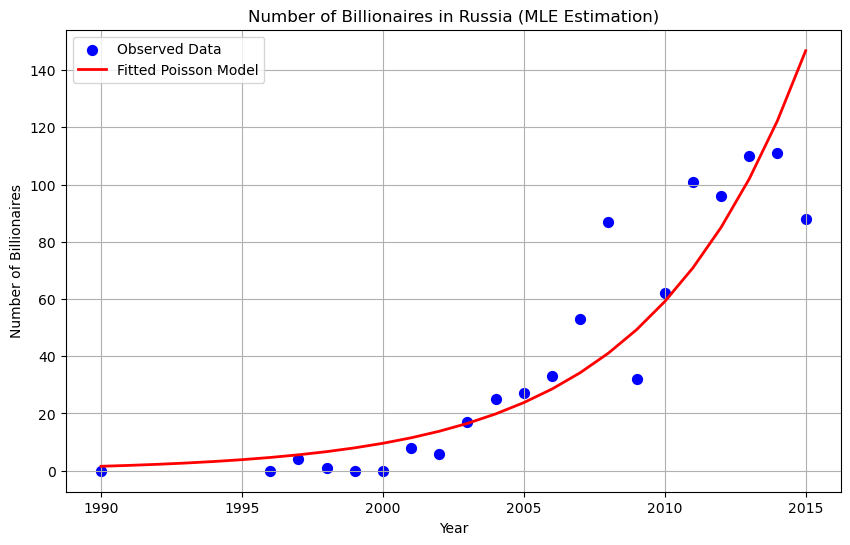

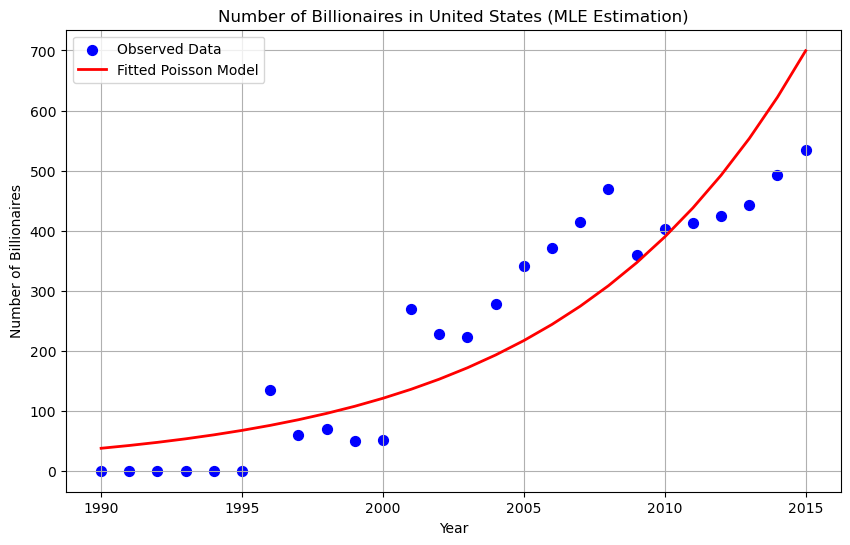

In [ ]:
# Visualization
def plot_results(data, β_hat, country):
    plt.figure(figsize=(10, 6))

    # Plot observed data
    plt.scatter(data['Year'], data['NumberOfBillionaires'], color='blue', label='Observed Data', s=50)

    # Plot fitted Poisson regression line
    years = np.arange(data['Year'].min(), data['Year'].max() + 1)
    X_new = np.column_stack((np.ones(len(years)), years))
    y_pred = np.exp(X_new @ β_hat)

    plt.plot(years, y_pred, color='red', label='Fitted Poisson Model', linewidth=2)

    plt.title(f'Number of Billionaires in {country} (MLE Estimation)')
    plt.xlabel('Year')
    plt.ylabel('Number of Billionaires')
    plt.legend()
    plt.grid()
    plt.show()

# Plot for Russian billionaires
plot_results(russian_data, β_hat_russia, 'Russia')

# Plot for American billionaires
plot_results(american_data, β_hat_usa, 'United States')